In [15]:
#ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [16]:
import pandas as pd
from sklearn.cluster import KMeans

In [17]:
# Visualizing
%matplotlib inline

# default pandas decimal number display format
pd.options.display.float_format = '{:20,.2f}'.format

In [18]:
df_orig = pd.read_csv('wines.csv')

In [19]:
df_orig.drop('wine_color', axis=1, inplace=True)

In [20]:
df_orig.drop('Unnamed: 0', axis=1, inplace=True)

In [21]:
df_orig

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5
1,7.80,0.88,0.00,2.60,0.10,25.00,67.00,1.00,3.20,0.68,9.80,5
2,7.80,0.76,0.04,2.30,0.09,15.00,54.00,1.00,3.26,0.65,9.80,5
3,11.20,0.28,0.56,1.90,0.07,17.00,60.00,1.00,3.16,0.58,9.80,6
4,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.20,0.21,0.29,1.60,0.04,24.00,92.00,0.99,3.27,0.50,11.20,6
6493,6.60,0.32,0.36,8.00,0.05,57.00,168.00,0.99,3.15,0.46,9.60,5
6494,6.50,0.24,0.19,1.20,0.04,30.00,111.00,0.99,2.99,0.46,9.40,6
6495,5.50,0.29,0.30,1.10,0.02,20.00,110.00,0.99,3.34,0.38,12.80,7


In [22]:
df_8 = df_orig

In [23]:
df_8

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5
1,7.80,0.88,0.00,2.60,0.10,25.00,67.00,1.00,3.20,0.68,9.80,5
2,7.80,0.76,0.04,2.30,0.09,15.00,54.00,1.00,3.26,0.65,9.80,5
3,11.20,0.28,0.56,1.90,0.07,17.00,60.00,1.00,3.16,0.58,9.80,6
4,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.20,0.21,0.29,1.60,0.04,24.00,92.00,0.99,3.27,0.50,11.20,6
6493,6.60,0.32,0.36,8.00,0.05,57.00,168.00,0.99,3.15,0.46,9.60,5
6494,6.50,0.24,0.19,1.20,0.04,30.00,111.00,0.99,2.99,0.46,9.40,6
6495,5.50,0.29,0.30,1.10,0.02,20.00,110.00,0.99,3.34,0.38,12.80,7


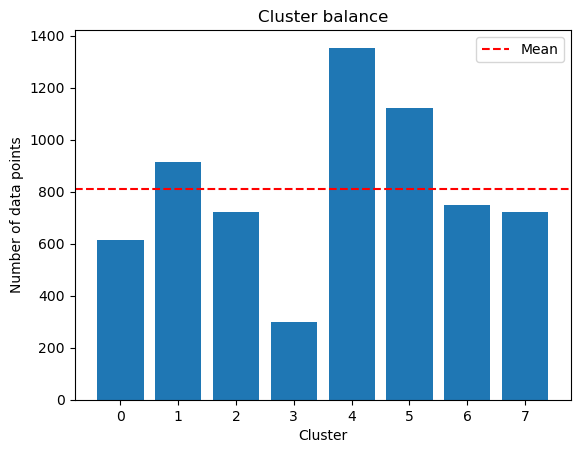

In [10]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define the feature matrix and quality variable
X = df_8.drop(['quality'], axis=1)

# Perform K-means clustering
kmeans = KMeans(n_clusters=8)
kmeans.fit(X)
labels = kmeans.labels_

# Count the number of data points in each cluster
counts = np.bincount(labels)

# Calculate the mean of the cluster counts
mean_count = np.mean(counts)

# Create a bar chart of the cluster counts
fig, ax = plt.subplots()
ax.bar(range(len(counts)), counts)
ax.set_xlabel('Cluster')
ax.set_ylabel('Number of data points')
ax.set_title('Cluster balance')

# Add a horizontal line representing the mean of the cluster counts
ax.axhline(y=mean_count, color='r', linestyle='--', label='Mean')

# Add a legend
ax.legend()

plt.show()

In [24]:
df_8

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5
1,7.80,0.88,0.00,2.60,0.10,25.00,67.00,1.00,3.20,0.68,9.80,5
2,7.80,0.76,0.04,2.30,0.09,15.00,54.00,1.00,3.26,0.65,9.80,5
3,11.20,0.28,0.56,1.90,0.07,17.00,60.00,1.00,3.16,0.58,9.80,6
4,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.20,0.21,0.29,1.60,0.04,24.00,92.00,0.99,3.27,0.50,11.20,6
6493,6.60,0.32,0.36,8.00,0.05,57.00,168.00,0.99,3.15,0.46,9.60,5
6494,6.50,0.24,0.19,1.20,0.04,30.00,111.00,0.99,2.99,0.46,9.40,6
6495,5.50,0.29,0.30,1.10,0.02,20.00,110.00,0.99,3.34,0.38,12.80,7


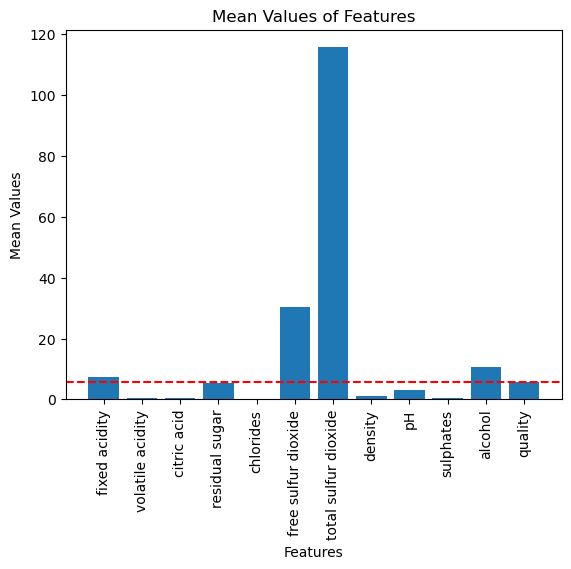

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the mean values for each feature
means = df_8.mean()

# Create a bar chart
fig, ax = plt.subplots()
ax.bar(df_8.columns, means)

# Set the rotation angle for the x-axis labels
plt.xticks(rotation=90)

# Add a horizontal line for the mean values
ax.axhline(y=np.mean(df_8['quality']), color='r', linestyle='--')

# Add labels and a title
ax.set_xlabel('Features')
ax.set_ylabel('Mean Values')
ax.set_title('Mean Values of Features')

plt.show()

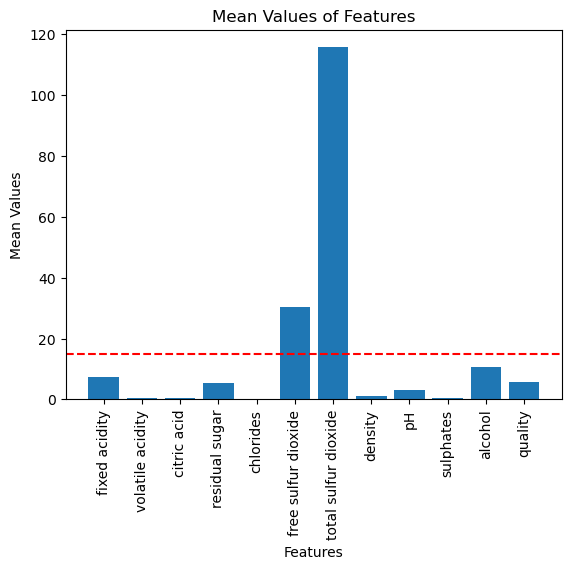

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the mean values for each feature
means = df_8.mean()

# Create a bar chart
fig, ax = plt.subplots()
ax.bar(df_8.columns, means)

# Set the rotation angle for the x-axis labels
plt.xticks(rotation=90)

# Add a horizontal line for the mean values
ax.axhline(y=means.mean(), color='r', linestyle='--')

# Add labels and a title
ax.set_xlabel('Features')
ax.set_ylabel('Mean Values')
ax.set_title('Mean Values of Features')

plt.show()


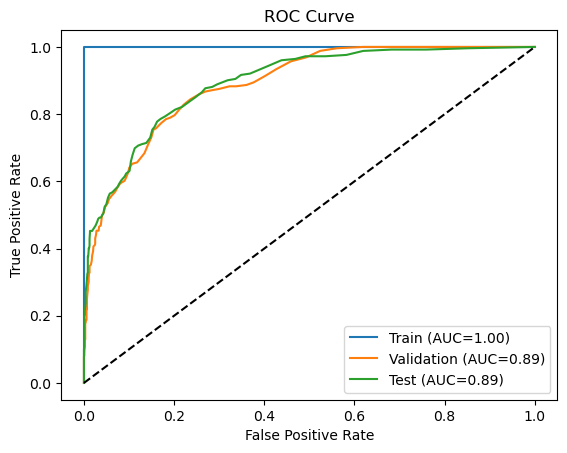

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

# Define the feature matrix and target variable
X = df_orig.drop('quality', axis=1)
y = df_orig['quality'].apply(lambda x: 1 if x >= 7 else 0)

# Split the dataset into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Train a random forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

# Predict on the train, validation, and test sets
y_train_pred = rfc.predict_proba(X_train)[:, 1]
y_val_pred = rfc.predict_proba(X_val)[:, 1]
y_test_pred = rfc.predict_proba(X_test)[:, 1]

# Compute ROC curves and AUC scores
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred)
fpr_val, tpr_val, thresholds_val = roc_curve(y_val, y_val_pred)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_pred)
auc_train = roc_auc_score(y_train, y_train_pred)
auc_val = roc_auc_score(y_val, y_val_pred)
auc_test = roc_auc_score(y_test, y_test_pred)

# Plot the ROC curves
plt.plot(fpr_train, tpr_train, label=f'Train (AUC={auc_train:.2f})')
plt.plot(fpr_val, tpr_val, label=f'Validation (AUC={auc_val:.2f})')
plt.plot(fpr_test, tpr_test, label=f'Test (AUC={auc_test:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

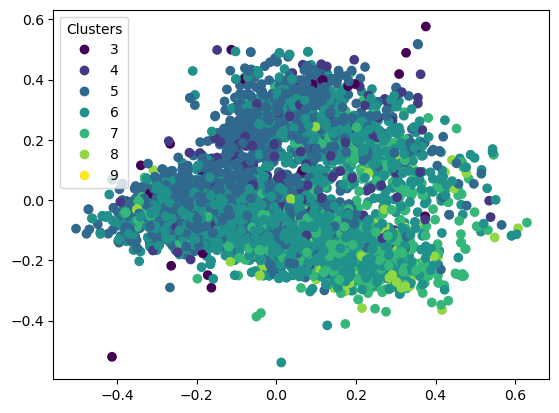

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

# Separate the features from the target variable
X = df_orig.drop('quality', axis=1)

# Standardize the features
scaler = MinMaxScaler()
X_std = scaler.fit_transform(X)

# Apply PCA to the standardized features
pca = PCA()
pca.fit(X_std)
X_pca = pca.transform(X_std)

# Create a scatter plot of the first two principal components
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_orig['quality'], cmap='viridis')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()

In [34]:
X = df_orig.drop("quality", axis=1).values
labels_true = df_orig["quality"].values

In [33]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

af = AffinityPropagation(preference=-50, random_state=0).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print("Estimated number of clusters: %d" % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
print(
    "Adjusted Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(labels_true, labels)
)
print(
    "Silhouette Coefficient: %0.3f"
    % metrics.silhouette_score(X, labels, metric="sqeuclidean")
)

Estimated number of clusters: 793
Homogeneity: 0.311
Completeness: 0.061
V-measure: 0.102
Adjusted Rand Index: 0.001
Adjusted Mutual Information: 0.041
Silhouette Coefficient: 0.410


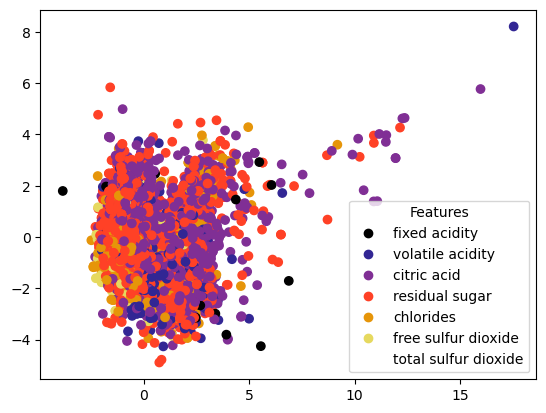

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler

# Separate the features from the target variable
X = df_orig.drop('quality', axis=1)

# Standardize the features
scaler = RobustScaler()
X_std = scaler.fit_transform(X)

# Apply PCA to the standardized features
pca = PCA()
pca.fit(X_std)
X_pca = pca.transform(X_std)

# Create a scatter plot of the df_origfirst two principal components
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_orig['quality'], cmap='CMRmap')
handles, labels = scatter.legend_elements()
labels = list(X.columns)  # use feature columns as legend names
plt.legend(handles, labels, title="Features")
plt.show()

In [ ]:
df_orig

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define the feature matrix and target variable
X = df_orig.drop('quality', axis=1)
y = df_orig['quality']

# Calculate baseline metrics
y_mean = y.mean()
y_pred = [y_mean] * len(y)
mse_baseline = mean_squared_error(y, y_pred)
mae_baseline = mean_absolute_error(y, y_pred)
r2_baseline = r2_score(y, y_pred)

print('Mean Squared Error (Baseline):', mse_baseline)
print('Mean Absolute Error (Baseline):', mae_baseline)
print('R-squared (Baseline):', r2_baseline)

Mean Squared Error (Baseline): 0.7624573958893047
Mean Absolute Error (Baseline): 0.6855510134808671
R-squared (Baseline): 0.0


In [37]:
from sklearn.metrics import accuracy_score, f1_score

# Define the feature matrix and target variable
X = df_orig.drop('quality', axis=1)
y = df_orig['quality']

# Calculate baseline metrics
y_mode = y.mode().values[0]
y_pred = [y_mode] * len(y)
accuracy_baseline = accuracy_score(y, y_pred)
f1_baseline = f1_score(y, y_pred, average='weighted')

print('Accuracy (Baseline):', accuracy_baseline)
print('F1 Score (Baseline):', f1_baseline)

Accuracy (Baseline): 0.43650915807295676
F1 Score (Baseline): 0.2652823255748217


In [38]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score

def baseline_metrics(df):
    # Define the feature matrix and target variable
    X = df.drop('quality', axis=1)
    y = df['quality']

    # Calculate baseline metrics
    y_mode = y.mode().values[0]
    y_pred = [y_mode] * len(y)
    accuracy_baseline = accuracy_score(y, y_pred)
    f1_baseline = f1_score(y, y_pred, average='weighted')

    print('Accuracy (Baseline):', accuracy_baseline)
    print('F1 Score (Baseline):', f1_baseline)
    
    # Create a dataframe to store the results
    metrics_df = pd.DataFrame({'Metric': ['Accuracy (Baseline)', 'F1 Score (Baseline)'],
                               'Value': [accuracy_baseline, f1_baseline]})
    
    return metrics_df

In [39]:
baseline_metrics(df_orig)

Accuracy (Baseline): 0.43650915807295676
F1 Score (Baseline): 0.2652823255748217


,Metric,Value
0,Accuracy (Baseline),0.44
1,F1 Score (Baseline),0.27


In [40]:
df = df_orig

In [41]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5
1,7.80,0.88,0.00,2.60,0.10,25.00,67.00,1.00,3.20,0.68,9.80,5
2,7.80,0.76,0.04,2.30,0.09,15.00,54.00,1.00,3.26,0.65,9.80,5
3,11.20,0.28,0.56,1.90,0.07,17.00,60.00,1.00,3.16,0.58,9.80,6
4,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.20,0.21,0.29,1.60,0.04,24.00,92.00,0.99,3.27,0.50,11.20,6
6493,6.60,0.32,0.36,8.00,0.05,57.00,168.00,0.99,3.15,0.46,9.60,5
6494,6.50,0.24,0.19,1.20,0.04,30.00,111.00,0.99,2.99,0.46,9.40,6
6495,5.50,0.29,0.30,1.10,0.02,20.00,110.00,0.99,3.34,0.38,12.80,7


In [42]:
# Combine alcohol and pH features
df['alcohol_ph'] = df['alcohol'] * df['pH']

# Combine volatile acidity and citric acid features
df['volatile_citric'] = df['volatile acidity'] * df['citric acid']

# Combine fixed acidity and sulphates features
df['fixed_sulphates'] = df['fixed acidity'] * df['sulphates']

# Combine total sulfur dioxide and free sulfur dioxide as sulfur_dioxide
df['sulfur_dioxide'] = df['total sulfur dioxide'] - df['free sulfur dioxide']

In [43]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,alcohol_ph,volatile_citric,fixed_sulphates,sulfur_dioxide
0,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5,32.99,0.00,4.14,23.00
1,7.80,0.88,0.00,2.60,0.10,25.00,67.00,1.00,3.20,0.68,9.80,5,31.36,0.00,5.30,42.00
2,7.80,0.76,0.04,2.30,0.09,15.00,54.00,1.00,3.26,0.65,9.80,5,31.95,0.03,5.07,39.00
3,11.20,0.28,0.56,1.90,0.07,17.00,60.00,1.00,3.16,0.58,9.80,6,30.97,0.16,6.50,43.00
4,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5,32.99,0.00,4.14,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.20,0.21,0.29,1.60,0.04,24.00,92.00,0.99,3.27,0.50,11.20,6,36.62,0.06,3.10,68.00
6493,6.60,0.32,0.36,8.00,0.05,57.00,168.00,0.99,3.15,0.46,9.60,5,30.24,0.12,3.04,111.00
6494,6.50,0.24,0.19,1.20,0.04,30.00,111.00,0.99,2.99,0.46,9.40,6,28.11,0.05,2.99,81.00
6495,5.50,0.29,0.30,1.10,0.02,20.00,110.00,0.99,3.34,0.38,12.80,7,42.75,0.09,2.09,90.00


In [44]:
#df.drop('Unnamed: 0', axis=1, inplace=True)

In [45]:
#df.drop('wine_color', axis=1, inplace=True)

In [46]:
df.drop('total sulfur dioxide', axis=1, inplace=True)

In [47]:
df.drop('free sulfur dioxide', axis=1, inplace=True)

In [48]:
df.drop('alcohol', axis=1, inplace=True)

In [49]:
df.drop('sulphates', axis=1, inplace=True)

In [50]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,density,pH,quality,alcohol_ph,volatile_citric,fixed_sulphates,sulfur_dioxide
0,7.40,0.70,0.00,1.90,0.08,1.00,3.51,5,32.99,0.00,4.14,23.00
1,7.80,0.88,0.00,2.60,0.10,1.00,3.20,5,31.36,0.00,5.30,42.00
2,7.80,0.76,0.04,2.30,0.09,1.00,3.26,5,31.95,0.03,5.07,39.00
3,11.20,0.28,0.56,1.90,0.07,1.00,3.16,6,30.97,0.16,6.50,43.00
4,7.40,0.70,0.00,1.90,0.08,1.00,3.51,5,32.99,0.00,4.14,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.20,0.21,0.29,1.60,0.04,0.99,3.27,6,36.62,0.06,3.10,68.00
6493,6.60,0.32,0.36,8.00,0.05,0.99,3.15,5,30.24,0.12,3.04,111.00
6494,6.50,0.24,0.19,1.20,0.04,0.99,2.99,6,28.11,0.05,2.99,81.00
6495,5.50,0.29,0.30,1.10,0.02,0.99,3.34,7,42.75,0.09,2.09,90.00


In [51]:
df1 = df

In [52]:
df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,density,pH,quality,alcohol_ph,volatile_citric,fixed_sulphates,sulfur_dioxide
0,7.40,0.70,0.00,1.90,0.08,1.00,3.51,5,32.99,0.00,4.14,23.00
1,7.80,0.88,0.00,2.60,0.10,1.00,3.20,5,31.36,0.00,5.30,42.00
2,7.80,0.76,0.04,2.30,0.09,1.00,3.26,5,31.95,0.03,5.07,39.00
3,11.20,0.28,0.56,1.90,0.07,1.00,3.16,6,30.97,0.16,6.50,43.00
4,7.40,0.70,0.00,1.90,0.08,1.00,3.51,5,32.99,0.00,4.14,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.20,0.21,0.29,1.60,0.04,0.99,3.27,6,36.62,0.06,3.10,68.00
6493,6.60,0.32,0.36,8.00,0.05,0.99,3.15,5,30.24,0.12,3.04,111.00
6494,6.50,0.24,0.19,1.20,0.04,0.99,2.99,6,28.11,0.05,2.99,81.00
6495,5.50,0.29,0.30,1.10,0.02,0.99,3.34,7,42.75,0.09,2.09,90.00


In [53]:
kmeans = KMeans(n_clusters=8, random_state=42)

In [54]:
kmeans.fit(df)

KMeans(random_state=42)

In [55]:
df.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,density,pH,alcohol_ph,volatile_citric,fixed_sulphates,sulfur_dioxide
quality,,,,,,,,,,,
3,7.85,0.52,0.28,5.14,0.08,1.00,3.26,33.31,0.11,4.01,82.82
4,7.29,0.46,0.27,4.15,0.06,0.99,3.23,32.92,0.11,3.72,82.80
5,7.33,0.39,0.31,5.80,0.06,1.00,3.21,31.62,0.11,3.90,90.60
6,7.18,0.31,0.32,5.55,0.05,0.99,3.22,34.08,0.09,3.88,84.25
7,7.13,0.29,0.33,4.73,0.05,0.99,3.23,36.78,0.09,3.98,78.08
8,6.84,0.29,0.33,5.38,0.04,0.99,3.22,37.70,0.09,3.53,82.98
9,7.42,0.30,0.39,4.12,0.03,0.99,3.31,40.34,0.11,3.45,82.60


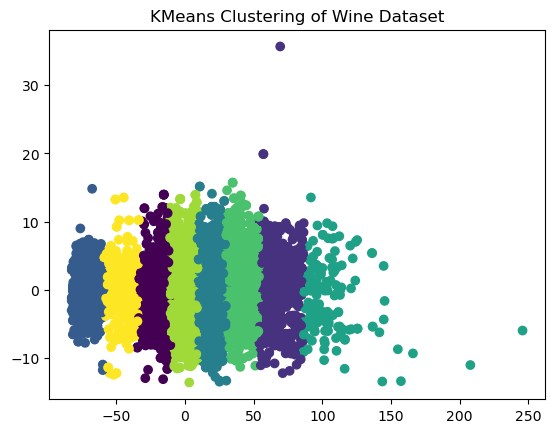

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


# extract the feature columns
X = df.drop(['quality'], axis=1)

# fit KMeans algorithm to the dataset
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans.fit(X)

# obtain cluster labels for each sample
labels = kmeans.labels_

# visualize the clusters using the first two principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.title('KMeans Clustering of Wine Dataset')
plt.show()


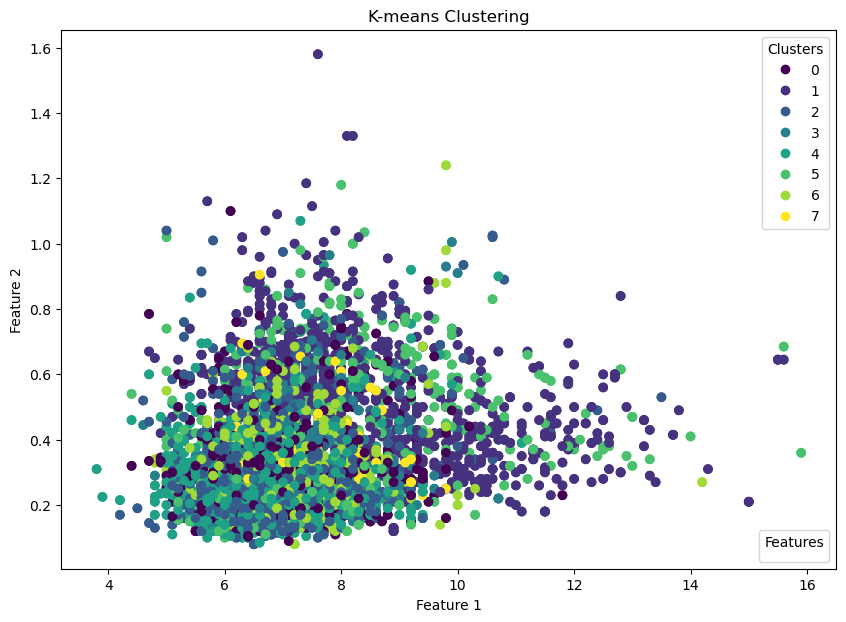

In [57]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define the feature matrix
X = df_orig.drop(['quality'], axis=1)

# Perform K-means clustering
kmeans = KMeans(n_clusters=8)
kmeans.fit(X)
labels = kmeans.labels_

# Create a scatter plot of the clusters
fig, ax = plt.subplots(figsize=(10, 7))
ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_title('K-means Clustering')

# Create a legend for the plot
scatter = ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels)
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Clusters")
ax.add_artist(legend1)

# Loop through the features and add them to the legend
for i, feature in enumerate(X.columns):
    handles, labels = [], []
    for j, label in enumerate(np.unique(labels)):
        handles.append(ax.scatter([], [], c='C{}'.format(j)))
        labels.append('Cluster {}'.format(label))
    ax.legend(handles, labels, loc='lower right', title='Features')
    plt.show()


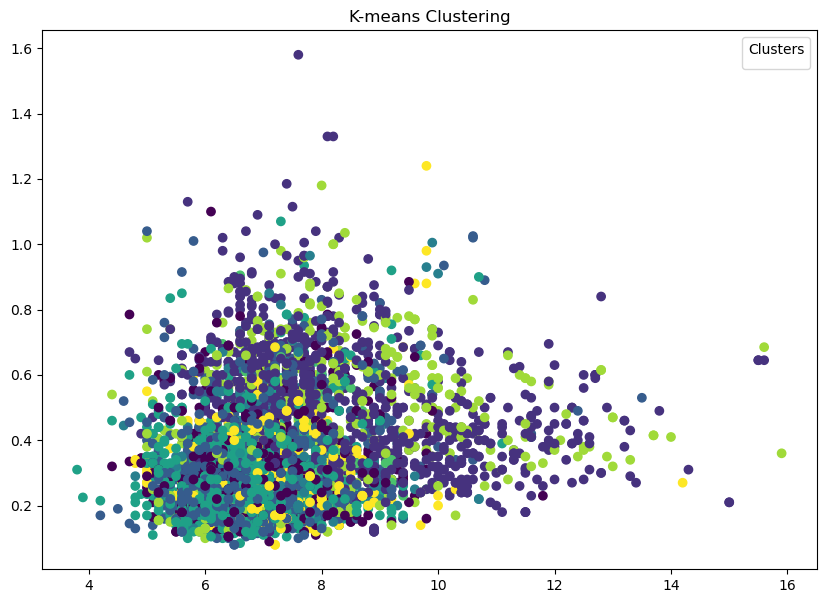

In [58]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Define the feature matrix and quality variable
X = df_orig.drop(['quality'], axis=1)
y = df_orig['quality']

# Perform K-means clustering
kmeans = KMeans(n_clusters=8)
kmeans.fit(X)
labels = kmeans.labels_

# Create a scatter plot of the clusters
fig, ax = plt.subplots(figsize=(10, 7))
for quality in np.unique(y):
    ax.scatter(X[y==quality].iloc[:, 0], X[y==quality].iloc[:, 1], 
               c=labels[y==quality], label=f'Quality {quality}')
ax.set_title('K-means Clustering')

# Create a legend for the plot
handles, labels = [], []
for j, label in enumerate(np.unique(labels)):
    handles.append(ax.scatter([], [], c='C{}'.format(j)))
    labels.append('Cluster {}'.format(label))
legend1 = ax.legend(handles, labels, loc="upper right", title="Clusters")

# Loop through the features and add them to the legend
handles, labels = [], []
for i, feature in enumerate(X.columns):
    for j, label in enumerate(np.unique(labels)):
        handles.append(ax.scatter([], [], c='C{}'.format(j), marker='o'))
        labels.append(feature)

plt.show()


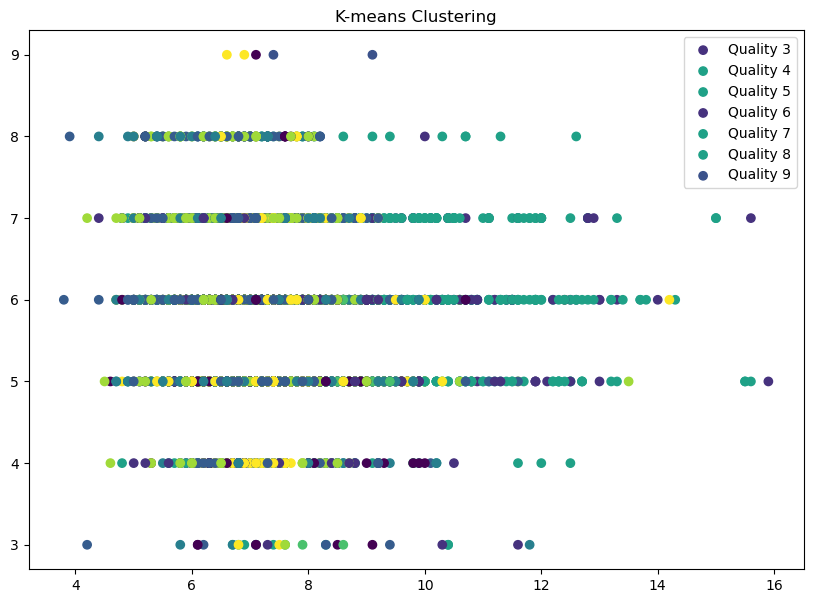

In [59]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define the feature matrix and quality variable
X = df_orig.drop(['quality'], axis=1)
y = df_orig['quality']

# Perform K-means clustering
kmeans = KMeans(n_clusters=8)
kmeans.fit(X)
labels = kmeans.labels_

# Create a scatter plot of the clusters
fig, ax = plt.subplots(figsize=(10, 7))
for quality in np.unique(y):
    ax.scatter(X[y==quality].iloc[:, 0], y[y==quality], 
               c=labels[y==quality], label=f'Quality {quality}')
ax.set_title('K-means Clustering')

# Create a legend for the plot
handles, labels = [], []
for j, label in enumerate(np.unique(labels)):
    handles.append(ax.scatter([], [], c='C{}'.format(j)))
    labels.append('Cluster {}'.format(label))
legend1 = ax.legend(handles, labels, loc="upper right")

# Loop through the features and add them to the legend
handles, labels = [], []
for i, feature in enumerate(X.columns):
    for j, label in enumerate(np.unique(labels)):
        handles.append(ax.scatter([], [], c='C{}'.format(j), marker='o'))
        labels.append(feature)
plt.legend()
plt.show()

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# extract the feature columns
X = df.drop(['quality'], axis=1)

# perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# perform KMeans clustering
kmeans = KMeans(n_clusters=9, random_state=42)
kmeans.fit(X_pca)

# obtain cluster labels for each sample
labels = kmeans.labels_

# compute the silhouette score
score = silhouette_score(X_pca, labels)

# compute the inertia
inertia = kmeans.inertia_

# print the silhouette score and inertia
print("Silhouette Score: ", score)
print("Inertia: ", inertia)

Silhouette Score:  0.4327922486719625
Inertia:  427085.5801211953


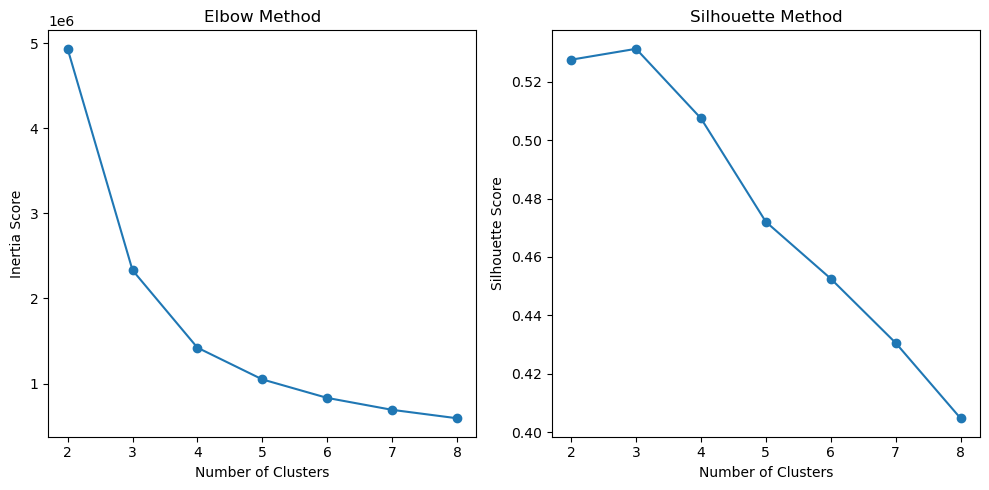

In [61]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score

def evaluate_kmeans(df, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(df)
    score = silhouette_score(df, kmeans.labels_)
    return score, kmeans.inertia_

# Compute inertia and silhouette score for k-means clustering
scores = []
inertias = []
for n_clusters in range(2, 9):
    score, inertia = evaluate_kmeans(df, n_clusters)
    scores.append(score)
    inertias.append(inertia)

# plot the inertia and silhouette scores
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(range(2, 9), inertias, marker='o')
ax[0].set_xlabel('Number of Clusters')
ax[0].set_ylabel('Inertia Score')
ax[0].set_title('Elbow Method')

ax[1].plot(range(2, 9), scores, marker='o')
ax[1].set_xlabel('Number of Clusters')
ax[1].set_ylabel('Silhouette Score')
ax[1].set_title('Silhouette Method')

plt.tight_layout()
plt.show()

> The first plot shows the elbow curve for the inertia scores, and the second plot shows the silhouette scores. The goal is to find the number of clusters that produces a good balance between a low inertia score and a high silhouette score.

In [62]:
def evaluate_clustering(df):
    X = df.drop(['quality'], axis=1)
    
    kmeans = KMeans(n_clusters=8, random_state=42)
    kmeans.fit(X)
    kmeans_labels = kmeans.labels_
    kmeans_score = silhouette_score(X, kmeans_labels)
    kmeans_inertia = kmeans.inertia_
    
    dbscan = DBSCAN(eps=1.5, min_samples=10)
    dbscan.fit(X)
    dbscan_labels = dbscan.labels_
    dbscan_score = silhouette_score(X, dbscan_labels)
    
    hierarchical = AgglomerativeClustering(n_clusters=8)
    hierarchical.fit(X)
    hierarchical_labels = hierarchical.labels_
    hierarchical_score = silhouette_score(X, hierarchical_labels)
    
    print(f"KMeans Silhouette Score: {kmeans_score:.3f}")
    print(f"KMeans Inertia: {kmeans_inertia:.3f}")
    print(f"DBSCAN Silhouette Score: {dbscan_score:.3f}")
    print(f"Hierarchical Silhouette Score: {hierarchical_score:.3f}")

In [63]:
evaluate_clustering(df)

KMeans Silhouette Score: 0.407
KMeans Inertia: 587225.869
DBSCAN Silhouette Score: -0.710
Hierarchical Silhouette Score: 0.354


In [64]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Define the feature matrix and target variable
X = df.drop('quality', axis=1)
y = df['quality']

# Convert the target variable to a binary classification problem
y = y.apply(lambda x: 1 if x >= 7 else 0)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the classification models
lr = LogisticRegression(random_state=42)
dtc = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Train and evaluate the classification models
for model in [lr, dtc, rfc]:
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the train and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Compute the metrics on the train and test sets
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    train_precision = precision_score(y_train, y_train_pred)
    test_precision = precision_score(y_test, y_test_pred)
    
    train_recall = recall_score(y_train, y_train_pred)
    test_recall = recall_score(y_test, y_test_pred)
    
    train_f1 = f1_score(y_train, y_train_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    
    # Print the metrics
    print('Model:', type(model).__name__)
    print('Train Accuracy:', train_accuracy)
    print('Test Accuracy:', test_accuracy)
    print('Train Precision:', train_precision)
    print('Test Precision:', test_precision)
    print('Train Recall:', train_recall)
    print('Test Recall:', test_recall)
    print('Train F1-score:', train_f1)
    print('Test F1-score:', test_f1)
    print('-------------------')


Model: LogisticRegression
Train Accuracy: 0.8129690205888013
Test Accuracy: 0.8253846153846154
Train Precision: 0.5595505617977528
Test Precision: 0.6106194690265486
Train Recall: 0.24292682926829268
Test Recall: 0.27380952380952384
Train F1-score: 0.33877551020408164
Test F1-score: 0.3780821917808219
-------------------
Model: DecisionTreeClassifier
Train Accuracy: 1.0
Test Accuracy: 0.8515384615384616
Train Precision: 1.0
Test Precision: 0.6113207547169811
Train Recall: 1.0
Test Recall: 0.6428571428571429
Train F1-score: 1.0
Test F1-score: 0.6266924564796905
-------------------
Model: RandomForestClassifier
Train Accuracy: 1.0
Test Accuracy: 0.8923076923076924
Train Precision: 1.0
Test Precision: 0.7978723404255319
Train Recall: 1.0
Test Recall: 0.5952380952380952
Train F1-score: 1.0
Test F1-score: 0.6818181818181819
-------------------


In [65]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Define the feature matrix and target variable
X = df.drop('quality', axis=1)
y = df['quality']

# Convert the target variable to a binary classification problem
y = y.apply(lambda x: 1 if x >= 7 else 0)

# Split the dataset into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Define the classification models
lr = LogisticRegression(random_state=42)
dtc = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Train and evaluate the classification models
for model in [lr, dtc, rfc]:
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the training set
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    
    # Predict on the validation set
    y_val_pred = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_precision = precision_score(y_val, y_val_pred)
    val_recall = recall_score(y_val, y_val_pred)
    val_f1 = f1_score(y_val, y_val_pred)
    
    # Predict on the testing set
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    
    # Print the metrics
    print('Model:', type(model).__name__)
    print('Training Set - Accuracy:', train_accuracy)
    print('Training Set - Precision:', train_precision)
    print('Training Set - Recall:', train_recall)
    print('Training Set - F1-score:', train_f1)
    print('Validation Set - Accuracy:', val_accuracy)
    print('Validation Set - Precision:', val_precision)
    print('Validation Set - Recall:', val_recall)
    print('Validation Set - F1-score:', val_f1)
    print('Testing Set - Accuracy:', test_accuracy)
    print('Testing Set - Precision:', test_precision)
    print('Testing Set - Recall:', test_recall)
    print('Testing Set - F1-score:', test_f1)
    print('-------------------')

Model: LogisticRegression
Training Set - Accuracy: 0.8157557095201436
Training Set - Precision: 0.5775075987841946
Training Set - Recall: 0.247074122236671
Training Set - F1-score: 0.34608378870673956
Validation Set - Accuracy: 0.81
Validation Set - Precision: 0.5398230088495575
Validation Set - Recall: 0.23828125
Validation Set - F1-score: 0.33062330623306235
Testing Set - Accuracy: 0.8284615384615385
Testing Set - Precision: 0.6306306306306306
Testing Set - Recall: 0.2777777777777778
Testing Set - F1-score: 0.38567493112947665
-------------------
Model: DecisionTreeClassifier
Training Set - Accuracy: 1.0
Training Set - Precision: 1.0
Training Set - Recall: 1.0
Training Set - F1-score: 1.0
Validation Set - Accuracy: 0.7930769230769231
Validation Set - Precision: 0.4738955823293173
Validation Set - Recall: 0.4609375
Validation Set - F1-score: 0.4673267326732673
Testing Set - Accuracy: 0.8176923076923077
Testing Set - Precision: 0.5280898876404494
Testing Set - Recall: 0.559523809523809

In [ ]:
df1

In [66]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the feature matrix and target variable
X = df.drop('quality', axis=1)
y = df['quality']

# Convert the target variable to a binary classification problem
y = y.apply(lambda x: 1 if x >= 7 else 0)

# Split the dataset into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Define the classification models
lr = LogisticRegression(random_state=42)
dtc = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

models = [lr, dtc, rfc]

# Create a dictionary to store the results
results_dict = {}

# Train and evaluate the classification models
for model in models:
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the training set
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    
    # Predict on the validation set
    y_val_pred = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_precision = precision_score(y_val, y_val_pred)
    val_recall = recall_score(y_val, y_val_pred)
    val_f1 = f1_score(y_val, y_val_pred)
    
    # Predict on the testing set
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    
    # Store the results in a dictionary
    results_dict[type(model).__name__] = {
        'Training Set - Accuracy': train_accuracy,
        'Training Set - Precision': train_precision,
        'Training Set - Recall': train_recall,
        'Training Set - F1-score': train_f1,
        'Validation Set - Accuracy': val_accuracy,
        'Validation Set - Precision': val_precision,
        'Validation Set - Recall': val_recall,
        'Validation Set - F1-score': val_f1,
        'Testing Set - Accuracy': test_accuracy,
        'Testing Set - Precision': test_precision,
        'Testing Set - Recall': test_recall,
        'Testing Set - F1-score': test_f1
    }
    
# Create a dataframe for each model
for model_name, results in results_dict.items():
    df = pd.DataFrame.from_dict(results, orient='index')
    df.columns = [model_name]
    display(df)

,LogisticRegression
Training Set - Accuracy,0.82
Training Set - Precision,0.58
Training Set - Recall,0.25
Training Set - F1-score,0.35
Validation Set - Accuracy,0.81
Validation Set - Precision,0.54
Validation Set - Recall,0.24
Validation Set - F1-score,0.33
Testing Set - Accuracy,0.83
Testing Set - Precision,0.63


,DecisionTreeClassifier
Training Set - Accuracy,1.00
Training Set - Precision,1.00
Training Set - Recall,1.00
Training Set - F1-score,1.00
Validation Set - Accuracy,0.79
Validation Set - Precision,0.47
Validation Set - Recall,0.46
Validation Set - F1-score,0.47
Testing Set - Accuracy,0.82
Testing Set - Precision,0.53


,RandomForestClassifier
Training Set - Accuracy,1.00
Training Set - Precision,1.00
Training Set - Recall,1.00
Training Set - F1-score,1.00
Validation Set - Accuracy,0.86
Validation Set - Precision,0.74
Validation Set - Recall,0.47
Validation Set - F1-score,0.57
Testing Set - Accuracy,0.87
Testing Set - Precision,0.75


In [67]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Define the feature matrix and target variable
X = df_8.drop('quality', axis=1)
y = df_8['quality']

# Convert the target variable to a binary classification problem
y = y.apply(lambda x: 1 if x >= 7 else 0)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the classification models
lr = LogisticRegression(random_state=42)
dtc = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Train and evaluate the classification models
for model in [lr, dtc, rfc]:
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the testing set
    y_pred = model.predict(X_test)
    
    # Compute the metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Print the metrics
    print('Model:', type(model).__name__)
    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1-score:', f1)
    print('-------------------')

Model: LogisticRegression
Accuracy: 0.8253846153846154
Precision: 0.6106194690265486
Recall: 0.27380952380952384
F1-score: 0.3780821917808219
-------------------
Model: DecisionTreeClassifier
Accuracy: 0.8515384615384616
Precision: 0.6113207547169811
Recall: 0.6428571428571429
F1-score: 0.6266924564796905
-------------------
Model: RandomForestClassifier
Accuracy: 0.8923076923076924
Precision: 0.7978723404255319
Recall: 0.5952380952380952
F1-score: 0.6818181818181819
-------------------


In [68]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the feature matrix and target variable
X = df_8.drop('quality', axis=1)
y = df_8['quality']

# Convert the target variable to a binary classification problem
y = y.apply(lambda x: 1 if x >= 7 else 0)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the classification models
lr = LogisticRegression(random_state=42)
dtc = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Calculate baseline metrics
y_mode = y.mode().values[0]
y_pred = [y_mode] * len(y)
accuracy_baseline = accuracy_score(y, y_pred)
f1_baseline = f1_score(y, y_pred, average='weighted')

# Train and evaluate the classification models
for model in [lr, dtc, rfc]:
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the testing set
    y_pred = model.predict(X_test)
    
    # Compute the metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Print the metrics
    print('Model:', type(model).__name__)
    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1-score:', f1)
    print('-------------------')


Model: LogisticRegression
Accuracy: 0.8253846153846154
Precision: 0.6106194690265486
Recall: 0.27380952380952384
F1-score: 0.3780821917808219
-------------------
Model: DecisionTreeClassifier
Accuracy: 0.8515384615384616
Precision: 0.6113207547169811
Recall: 0.6428571428571429
F1-score: 0.6266924564796905
-------------------
Model: RandomForestClassifier
Accuracy: 0.8923076923076924
Precision: 0.7978723404255319
Recall: 0.5952380952380952
F1-score: 0.6818181818181819
-------------------
